In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
import sys

sys.path.append(os.path.abspath(os.path.join("../..")))
sys.path.append(os.path.abspath(os.path.join("../scripts")))

In [3]:
import eda_functions as eda

In [4]:
import warnings 

# Suppressing warning messages
warnings.filterwarnings('ignore')

In [5]:
# set font size 

plt.rcParams.update({'font.size': 12})

In [6]:
# import the cleaned data

data = pd.read_csv("../data/AdSmartClean_data.csv")

data.head(5)

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
1,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1,0
2,00a1384a-5118-4d1b-925b-6cdada50318d,exposed,2020-07-06,8,Generic Smartphone,6,Chrome Mobile,0,1
3,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1,0
4,00ebf4a8-060f-4b99-93ac-c62724399483,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,1


In [7]:
# colums 'date' and 'hour' have object as their datatype
data.dtypes

auction_id     object
experiment     object
date           object
hour            int64
device_make    object
platform_os     int64
browser        object
yes             int64
no              int64
dtype: object

In [8]:
# Change data type from object to datetime for columns "date" and "hour"
# Add it as a new additional column

data['datetime'] = pd.to_datetime(data['date']) + pd.to_timedelta(data['hour'], 'h')

In [9]:
# transform yes, no columns from 0,1 values to one column that contain 'yes' or 'no' as strings

data['answer'] = data['yes'].apply(lambda x: {0:'no', 1:'yes'}[x])

# Explorative Data Analysis

## 1. Univariate Analysis

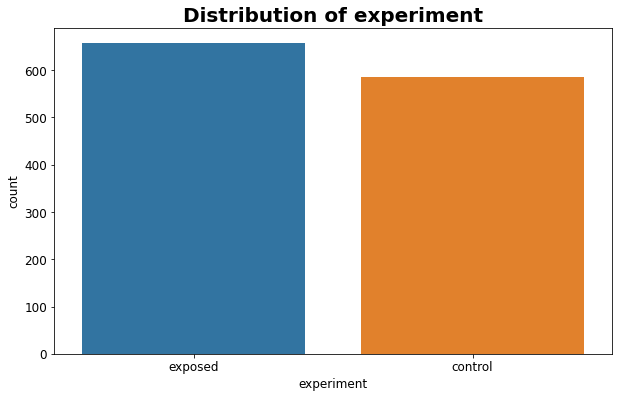

In [10]:
# take a look at historgram of "experiment" values 
eda.plot_count(data, 'experiment')

#### We observe that control group and treatment group have similar number of participants, with treatment group being slightly bigger

In [11]:
#label our data by day of the week
data['day'] = data['datetime'].dt.day_name()

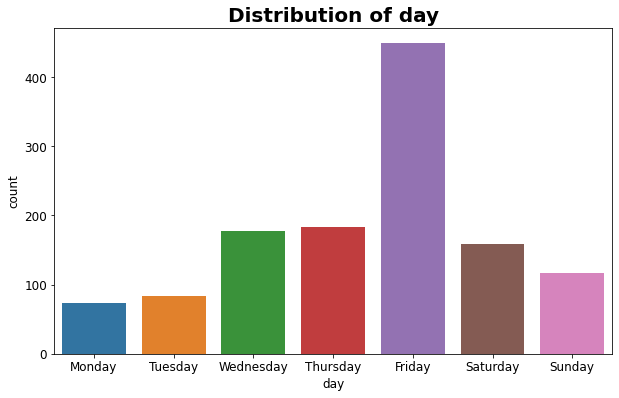

In [12]:
# look at data ditribution by day of the week
eda.plot_count(data, 'day', order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

#### We observe that Friday has the most user response.

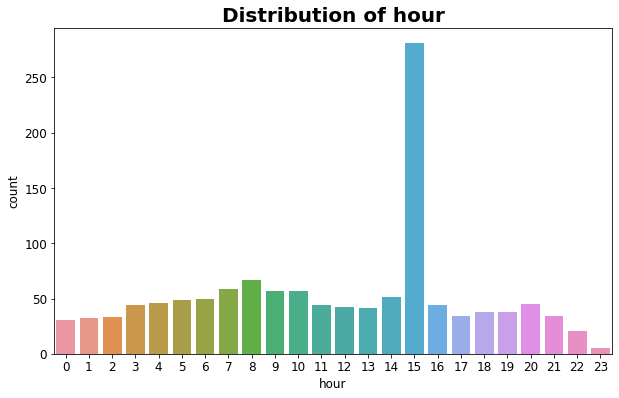

In [13]:
# look at the data distribution by hour of the day
eda.plot_count(data, 'hour')

#### We observe that 3 pm has by far the most user response.

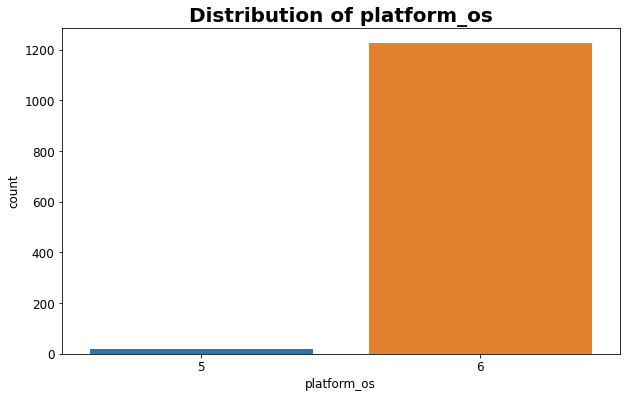

In [14]:
# take a look at historgram of "platform_os" values 
eda.plot_count(data, 'platform_os')

#### Almost all users used platform_os 6

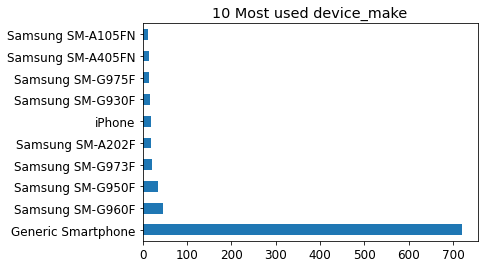

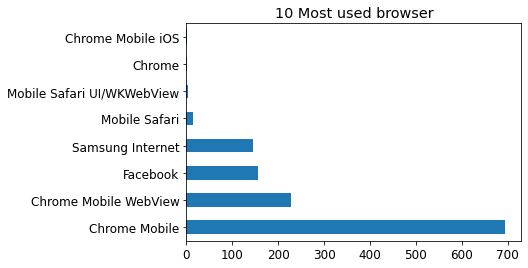

In [15]:
# The 10 most common used device and browsers

for col in ['device_make', 'browser']:
    data[col].value_counts().head(10).plot(kind= 'barh')
    plt.title("10 Most used {}".format(col))
    plt.show()

#### We observe that the most user device is Generic Smartphone, and the most used browser is Chrome Mobile.

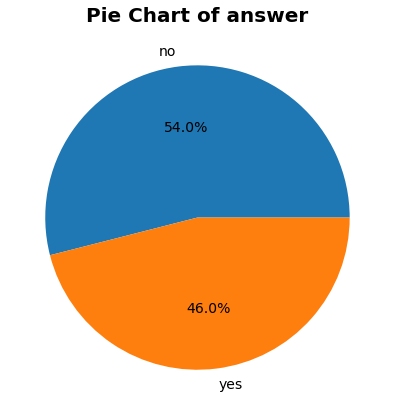

In [16]:
# Proportions of 'yes' and 'no' responses

eda.plot_pie(data, 'answer')

## 2. Multivariant Analysis

#### We compare Control group to Treatment group

In [17]:
# group the data by experiment group

grouped = data.groupby('experiment')
group_names = ['control', 'exposed']

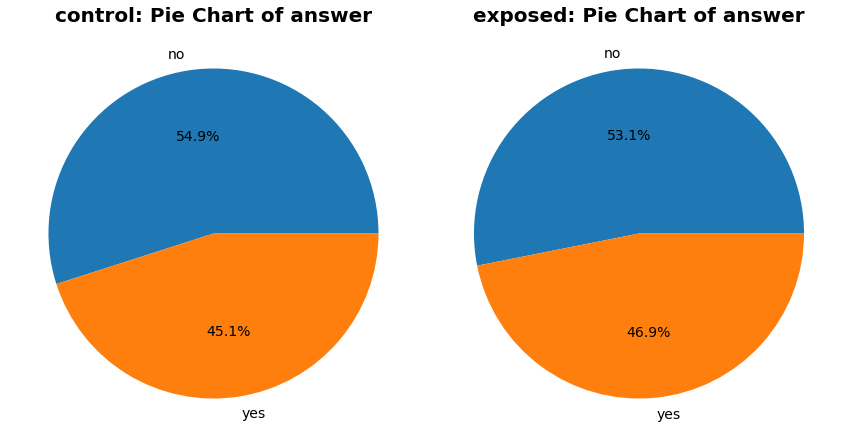

In [18]:
_, axes =plt.subplots(1,2, figsize=(12,7))

for i, grp in enumerate(group_names):
    df = grouped.get_group(grp)
    eda.plot_pie_compare(axes[i], df, 'answer', group= grp)
        
plt.tight_layout()
plt.show()

#### We notice that conversion rate in treatment group is higher (46.9% compared to  45.1%). This is a good sign, however we cannot yet conclude that SmartAd Ads are the reason behind this.

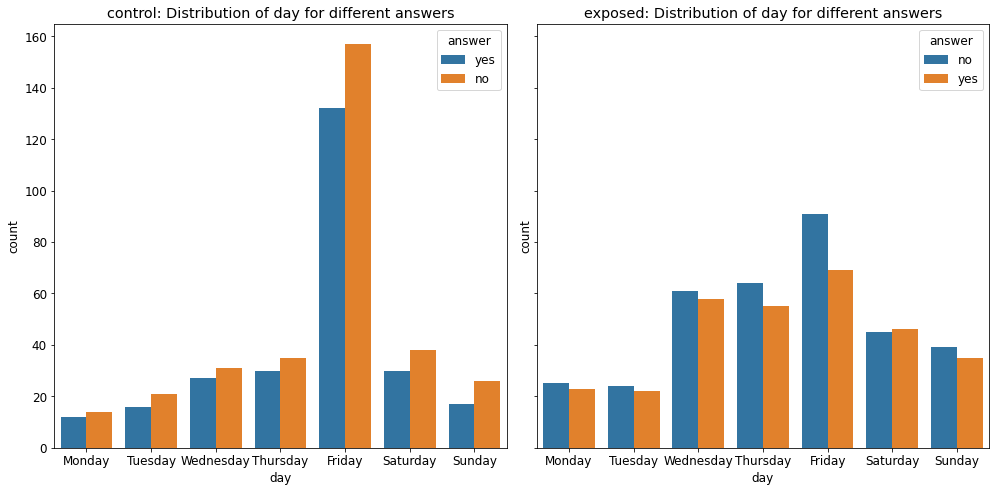

In [19]:
_, axes =plt.subplots(1,2, figsize=(14,7), sharey=True)

for i, grp in enumerate(group_names):
    df = grouped.get_group(grp)
    eda.plot_count_compare(axes[i], df, 'day', group=grp, hue = 'answer',
                           order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
        
plt.tight_layout()
plt.show()

#### We observe that Friday was the day with most total responses and most total responses for both Treatment and Control groups.

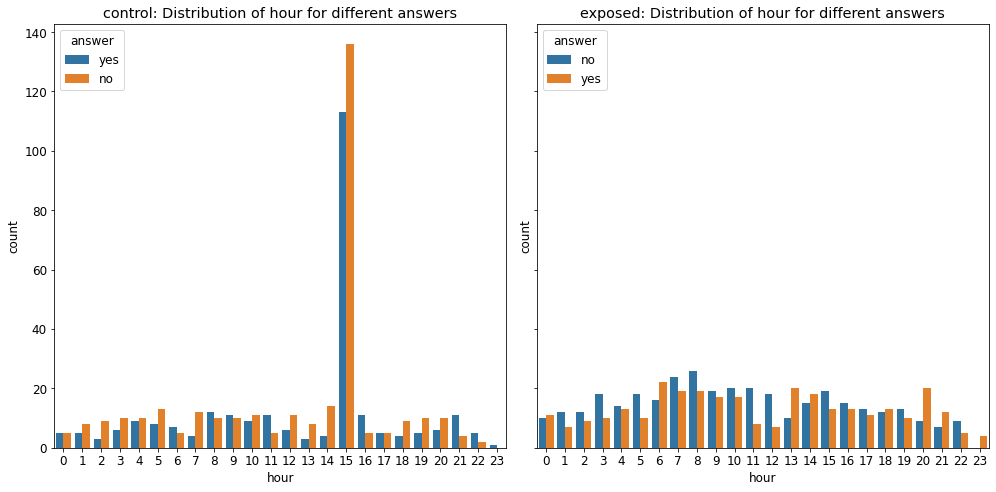

In [20]:
_, axes =plt.subplots(1,2, figsize=(14,7), sharey= True)

for i, grp in enumerate(group_names):
    df = grouped.get_group(grp)
    eda.plot_count_compare(axes[i], df, 'hour', group=grp, hue = 'answer')
        
plt.tight_layout()
plt.show()

#### We observe the 3 pm peak happens only in the control group.

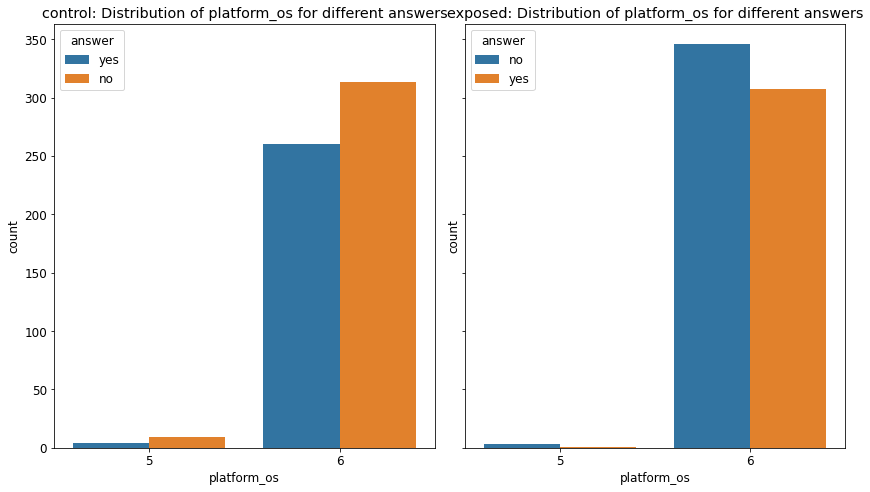

In [21]:
_, axes =plt.subplots(1,2, figsize=(12,7), sharey= True)

for i, grp in enumerate(group_names):
    df = grouped.get_group(grp)
    eda.plot_count_compare(axes[i], df, 'platform_os', group=grp, hue = 'answer')
        
plt.tight_layout()
plt.show()

#### Almost all users used platform_os 6

In [22]:
# Group the data by experiment group and answer

grouped = data.groupby(['experiment', 'answer'])
group_names = [('control', 'yes'), ('control', 'no'), ('exposed', 'yes'), ('exposed', 'no')]

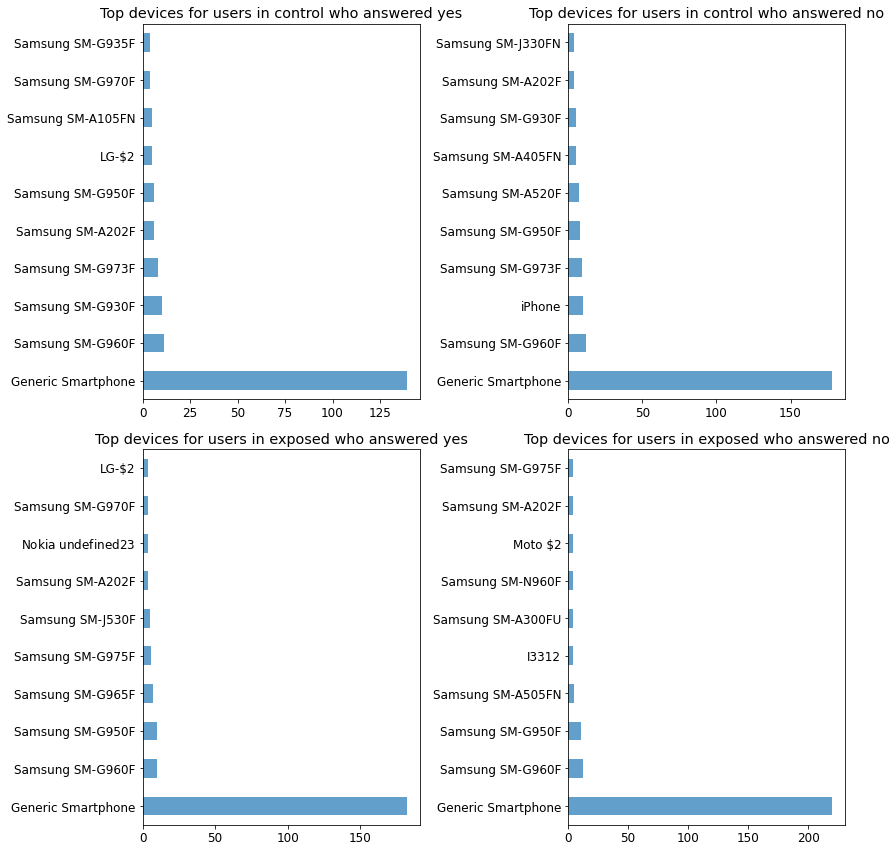

In [23]:
_, axes =plt.subplots(2,2, figsize=(12,12))

for i, grp in enumerate(['control', 'exposed']):
    for j, answr in enumerate(['yes', 'no']):
        df = grouped.get_group((grp, answr))
        df['device_make'].value_counts().head(10).plot.barh(ax= axes[i,j], alpha=0.7)
        axes[i,j].set_title('Top devices for users in {} who answered {}'.format(grp, answr))
        
plt.tight_layout()
plt.show()

#### We observe that the most user device is Generic Smartphone for both groups and both answers

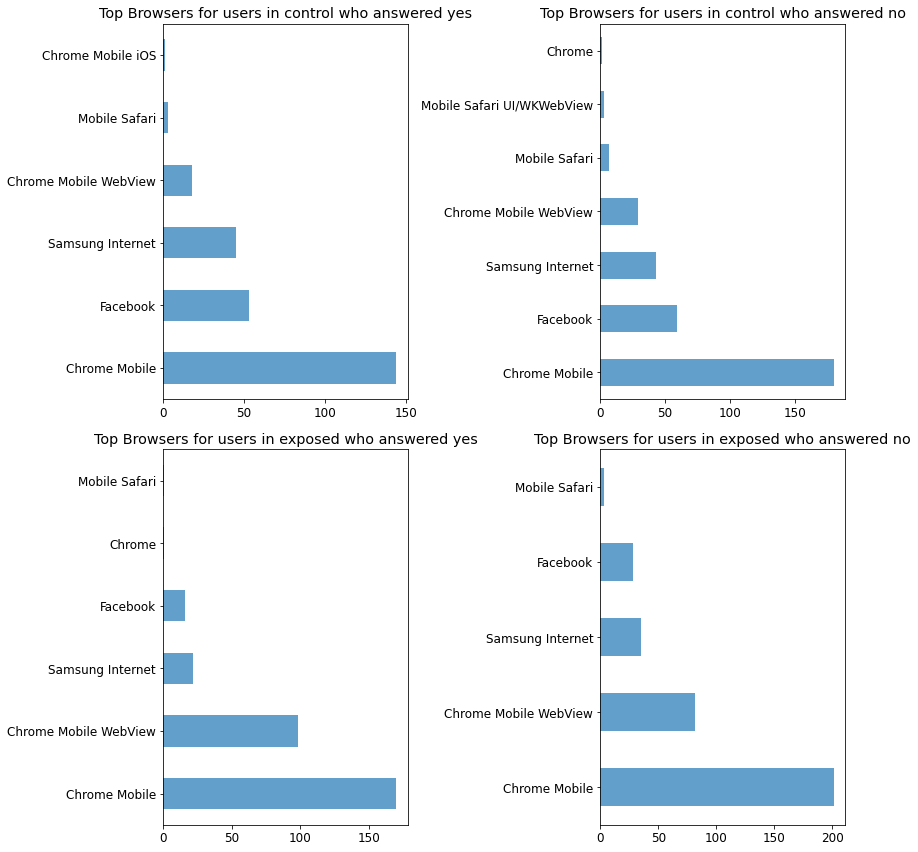

In [24]:
_, axes =plt.subplots(2,2, figsize=(12,12))

for i, grp in enumerate(['control', 'exposed']):
    for j, answr in enumerate(['yes', 'no']):
        df = grouped.get_group((grp, answr))
        df['browser'].value_counts().head(10).plot.barh(ax= axes[i,j], alpha=0.7)
        axes[i,j].set_title('Top Browsers for users in {} who answered {}'.format(grp, answr))
        
plt.tight_layout()
plt.show()

#### We observe that the most used Browser is Chrome Mobile for both groups and both answers. However, in second place, Chrome Mobile WebView is more common in treatment group.